In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import json

In [36]:
# get current directory
path = os.getcwd()
path_F1 = os.path.abspath(os.path.join(os.path.join(path, os.pardir), './model/quantization/mcqa_quantization_evaluation_results/F1_scores'))
os.listdir(path_F1)

['flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-fp4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-fp4_double',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-nf4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-nf4_double',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-fp4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-fp4_double',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-nf4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-nf4_double',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-6',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-8',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-fp4',
 'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-fp4_double',
 'flan-t5-large_mcqa-

In [37]:
import re

def extract_model_params(model_name):
    # Define the regex pattern to capture the parameters and their values
    pattern = re.compile(
        r'flan-t5-large_mcqa-LoRA-merged-mcqa-(?P<dataset>ai2-sciq|ai2)_quant(?P<quant_bits>\d+)' +
        r'(?:_cd-(?P<compute_dtype>[^_]+))?(?:_qt-(?P<quant_type>[^_]+))?' +
        r'(?:_double)?(?:_thresh-(?P<outliers_threshold>\d+))?$'
    )
    
    match = pattern.match(model_name)
    
    if not match:
        print(f"Model Name: {model_name}")
        params = {'dataset': 'ai2-sciq',
        'quant_bits': 32,
        'compute_dtype': None,
        'quant_type': None,
        'outliers_threshold': None,
        'double': False}
        with open(os.path.join(path_F1, model_name), 'r') as file:
            score = json.load(file)
            score['F1_scores'] = score['combined']['f1']
            score['ai2'] = score['ai2']['f1']
            score['sciq'] = score['sciq']['f1']
            score['mmlu'] = score['mmlu']['f1']
            score['M1'] = score['M1']['f1']
            
        # Add the score to the parameters dictionary
        params.update(score)
        return params
    
    params = match.groupdict()
    
    # If double is in the model name, set double to True
    params['double'] = 'double' in model_name
    
    # Ensure quant_bits is converted to an integer
    params['quant_bits'] = int(params['quant_bits'])
    
    # Convert outliers_threshold to an integer if it exists
    if params.get('outliers_threshold') is not None:
        params['outliers_threshold'] = int(params['outliers_threshold'])
    
    with open(os.path.join(path_F1, model_name), 'r') as file:
        score = json.load(file)
        score['F1_scores'] = score['combined']['f1']
        score['ai2'] = score['ai2']['f1']
        score['sciq'] = score['sciq']['f1']
        score['mmlu'] = score['mmlu']['f1']
        score['M1'] = score['M1']['f1']
        
    # Add the score to the parameters dictionary
    params.update(score)
    return params

# Example usage:
model_names = [
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-nf4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-None_qt-fp4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-fp4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-nf4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant8_thresh-8',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant8_thresh-6',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-None_qt-fp4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-nf4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-nf4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-6',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-8',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-fp4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-nf4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-None_qt-nf4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-fp4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-bf16_qt-fp4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant8_thresh-4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2_quant4_cd-None_qt-nf4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-nf4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-None_qt-fp4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant8_thresh-4',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq_quant4_cd-bf16_qt-fp4_double',
    'flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq'
]


# for model_name in model_names:
#     print(f"Model Name: {model_name}")
#     params = extract_model_params(model_name)
#     if params:
#         for key, value in params.items():
#             print(f"  {key}: {value}")
#     else:
#         print("  No parameters extracted (pattern may not match).")
#     print()

f1_data = pd.DataFrame([extract_model_params(model_name) for model_name in model_names])
f1_data

Model Name: flan-t5-large_mcqa-LoRA-merged-mcqa-ai2-sciq


,dataset,quant_bits,compute_dtype,quant_type,outliers_threshold,double,combined,ai2,sciq,mmlu,M1,num_params,memory_footprint,F1_scores
0,ai2-sciq,4,bf16,nf4,NaN,True,{'f1': 0.49957807819197453},0.570606,0.777024,0.329271,0.355046,493743104,974903296,0.499578
1,ai2,4,None,fp4,NaN,True,{'f1': 0.47864012764261704},0.572800,0.707935,0.316159,0.472363,493743104,974903296,0.478640
2,ai2-sciq,4,bf16,fp4,NaN,False,{'f1': 0.48974086557160373},0.558408,0.766021,0.318272,0.389624,493743104,974903296,0.489741
3,ai2-sciq,4,None,nf4,NaN,False,{'f1': 0.4983761251891735},0.572314,0.776028,0.326326,0.355046,493743104,974903296,0.498376
4,ai2,8,None,None,8.0,False,{'f1': 0.48299225193765855},0.585955,0.715197,0.318065,0.369312,783150080,1264310272,0.482992
5,ai2,8,None,None,6.0,False,{'f1': 0.48299225193765855},0.585955,0.715197,0.318065,0.369312,783150080,1264310272,0.482992
6,ai2,4,None,fp4,NaN,False,{'f1': 0.4788699602756956},0.572821,0.707946,0.316687,0.472363,493743104,974903296,0.478870
7,ai2,4,bf16,nf4,NaN,False,{'f1': 0.4875810783988333},0.594138,0.720912,0.318594,0.443675,493743104,974903296,0.487581
8,ai2,4,bf16,nf4,NaN,True,{'f1': 0.48786806391250787},0.594783,0.721004,0.318879,0.443675,493743104,974903296,0.487868
9,ai2-sciq,8,None,None,6.0,False,{'f1': 0.49413331565780017},0.559660,0.774044,0.324484,0.373438,783150080,1264310272,0.494133


In [38]:

#in df, if quanf_bits is 8, then add LLM.int8() in quant_type
f1_data['quant_type'] = f1_data.apply(lambda row: 'LLM.int8()' if row['quant_bits'] == 8 else row['quant_type'], axis=1)

#if quant_bits is 32 remove row
# f1_data = f1_data[f1_data['quant_bits'] != 32]
f1_data['quant_type'] = f1_data.apply(lambda row: 'MCQA model 32 bits' if row['quant_bits'] == 32 else row['quant_type'], axis=1)
f1_data['compute_dtype'] = f1_data.apply(lambda row: 'float32' if row['quant_bits'] == 32 and row['compute_dtype'] == None else row['compute_dtype'], axis=1)
#if double is True, then add -qd in existing quant_type in quant_type
f1_data['quant_type'] = f1_data.apply(lambda row: row['quant_type'] + '-qd' if row['double'] else row['quant_type'], axis=1)

#if compute_dtype is None and quant_bits is 4, replace compute_dtype with float32 in compute_dtype 
f1_data['compute_dtype'] = f1_data.apply(lambda row: 'float32' if row['quant_bits'] == 4 and row['compute_dtype'] == "None" else row['compute_dtype'], axis=1)
#if compute_dtype is None and quant_bits is 8, replace compute_dtype with float16 in compute_dtype 
f1_data['compute_dtype'] = f1_data.apply(lambda row: 'float16/int8' if row['quant_bits'] == 8 and row['compute_dtype'] == None else row['compute_dtype'], axis=1)

#replace NaN in outliers_threshold with None
f1_data['outliers_threshold'] = f1_data['outliers_threshold'].fillna('None')

#add outliers_threshold value if exists in quant_type
# f1_data['quant_type'] = f1_data.apply(lambda row: row['quant_type'] + f', outliers_threshold-{row["outliers_threshold"]}' if row['outliers_threshold']>3 else row['quant_type'], axis=1)

#change order of rows depending of string size order of quant-type values
f1_data = f1_data.sort_values(by='quant_type', ascending=False)

f1_data[f1_data['dataset'] == 'ai2-sciq']

,dataset,quant_bits,compute_dtype,quant_type,outliers_threshold,double,combined,ai2,sciq,mmlu,M1,num_params,memory_footprint,F1_scores
0,ai2-sciq,4,bf16,nf4-qd,None,True,{'f1': 0.49957807819197453},0.570606,0.777024,0.329271,0.355046,493743104,974903296,0.499578
12,ai2-sciq,4,float32,nf4-qd,None,True,{'f1': 0.49878677504691393},0.573217,0.777024,0.326153,0.355046,493743104,974903296,0.498787
3,ai2-sciq,4,float32,nf4,None,False,{'f1': 0.4983761251891735},0.572314,0.776028,0.326326,0.355046,493743104,974903296,0.498376
18,ai2-sciq,4,bf16,nf4,None,False,{'f1': 0.4986625025551322},0.572307,0.775036,0.327597,0.355046,493743104,974903296,0.498663
21,ai2-sciq,4,bf16,fp4-qd,None,True,{'f1': 0.489185556081953},0.558297,0.765037,0.316937,0.398109,493743104,974903296,0.489186
11,ai2-sciq,4,float32,fp4-qd,None,True,{'f1': 0.48991953409976186},0.558274,0.765062,0.318649,0.398109,493743104,974903296,0.489920
19,ai2-sciq,4,float32,fp4,None,False,{'f1': 0.49090699712792796},0.560049,0.766058,0.319332,0.398109,493743104,974903296,0.490907
2,ai2-sciq,4,bf16,fp4,None,False,{'f1': 0.48974086557160373},0.558408,0.766021,0.318272,0.389624,493743104,974903296,0.489741
22,ai2-sciq,32,float32,MCQA model 32 bits,None,False,{'f1': 0.4968434045700768},0.562935,0.774062,0.327306,0.395601,783150080,3132600320,0.496843
10,ai2-sciq,8,float16/int8,LLM.int8(),8.0,False,{'f1': 0.49413331565780017},0.559660,0.774044,0.324484,0.373438,783150080,1264310272,0.494133


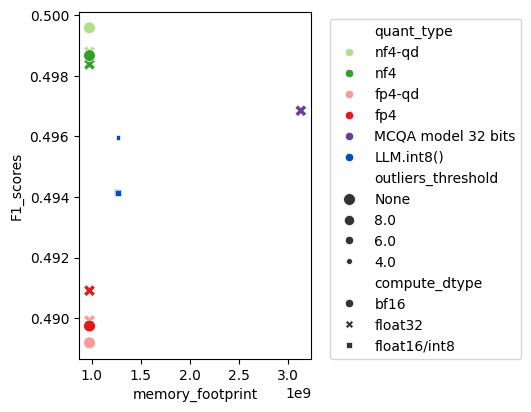

In [39]:
import matplotlib.pyplot as plt

palette = [(0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (0.0, 0.3, 0.7) 
 ]

fig, ax = plt.subplots(figsize=(3, 4.5))
ax = sns.scatterplot(
    data=f1_data[f1_data['dataset'] == 'ai2-sciq'],
    x='memory_footprint',
    y='F1_scores',
    hue='quant_type',
    size='outliers_threshold',
    style='compute_dtype',
    palette=palette
)

# Set legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('F1_ai2-sciq.png', bbox_inches='tight', dpi=600)

plt.show()